## Gráfico de Radar
Gráfico que compara más de dos variables numéricas de un mismo registro o grupo en nuestro dataset al mismo tiempo. Los ejes son radiales. Se traza una línea que va cruzando cada valor numérico de cada variable Eje a Eje a lo largo de un círculo. Su objetivo es comparar las magnitudes de varias variables entre dos o más observaciones o grupos al mismo tiempo.

**Otros nombres**: Radar Chart, Spider Chart, Gráfico Tadial, Gráfico de Araña.

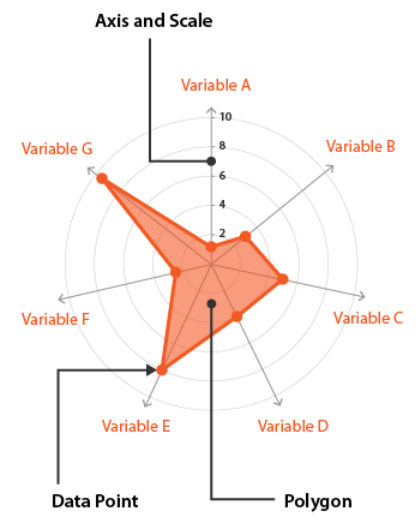

**Ejemplo de uso**
- Comparar estadísticas entre jugadores de fútbol.

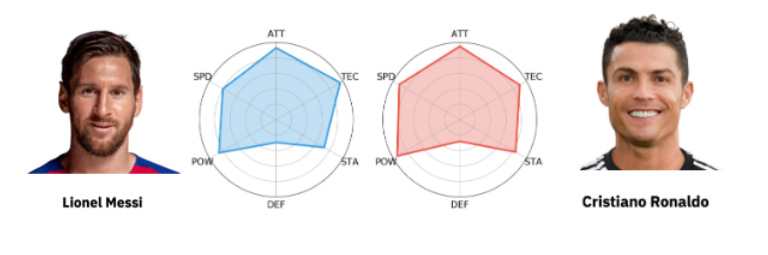

#### Cuando utilizar
- Quiero comparar diversas variables numéricas de uno o más grupos de observaciones. También podemos comparar observaciones individuales.

#### Consejos
- Las variables comparadas tienen que (preferiblemente) tener una escala similar. O al menos, compartir la misma unidad de medición. De otro modo, el gráfico será difícil de interpretar.
- Si estoy comparando diversos grupos u observaciones de forma apilada en el mismo gráfico radar, se puede volver ilegible. Una solución serpia limitar los grupos, o hacer un Gráfico Radar diferente por cada grupo en ves de apilarlos en uno solo.
- De mismo modo, si tengo muchas variables, también se puede volver ilegible, ya que tendría demasiados Ejes. También puedo aplicar la misma solución del punto anterior. Es decir, hacer un gráfico radar diferente para comparar otras variables.
- Es un gráfico con usos muy limitados ya que facilmente se vuelve complejo de entender. Y muy dificilmente vamos a tener muchas variables con rangos de valores comparables en un dataset.

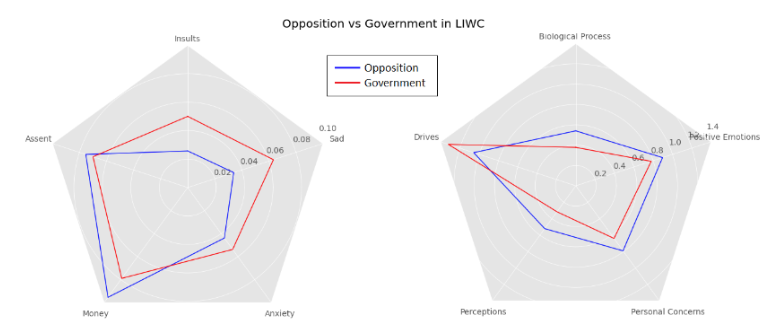

### En esta clase

#### Datos
Información sobre especies de pingüinos.

#### Objetivos
1. Cómo se comparan las medidas de los pingüinos de diferentes especies.

### Referencias
- https://github.com/lkuffo/data-viz/blob/main/NIVEL2/5_radar.ipynb
- https://datavizcatalogue.com/ES/metodos/grafico_radial.html
- https://plotly.com/python/radar-chart/

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/restaurantes.csv')
df

,Nombre,Comida,Variedad,Servicio,Ambiente,Precio
0,Restaurante 1,4,4,5,4,3
1,Restaurante 2,5,5,4,5,2
2,Restaurante 3,3,4,5,3,5


In [4]:
import plotly.graph_objects as go

In [7]:
df.iloc[0, 1:]

Comida      4
Variedad    4
Servicio    5
Ambiente    4
Precio      3
Name: 0, dtype: object

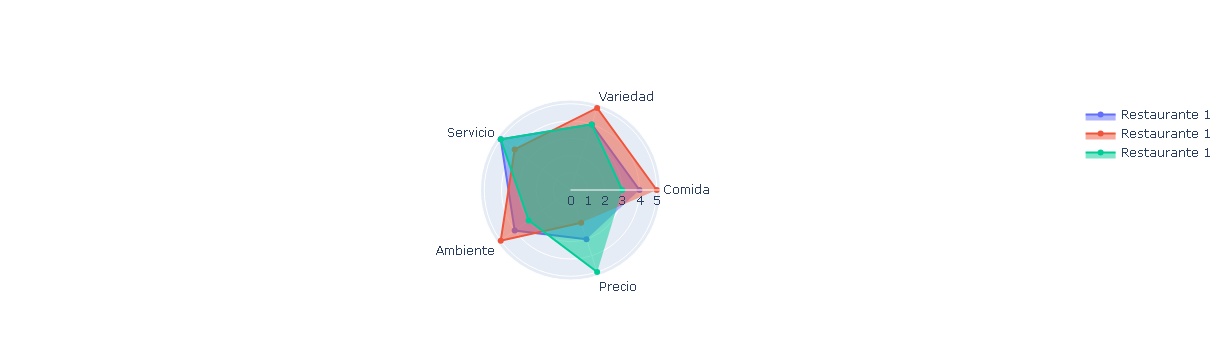

In [14]:
categorias = ['Comida', 'Variedad', 'Servicio', 'Ambiente', 'Precio']

fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=df.iloc[0, 1:], # se grafican los valores de cada columna para el restaurante 1
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Restaurante 1'
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=df.iloc[1, 1:], # se grafican los valores de cada columna para el restaurante 2
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Restaurante 1'
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=df.iloc[2, 1:], # se grafican los valores de cada columna para el restaurante 3
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Restaurante 1'
    )
)

fig.show()

In [15]:
df = pd.read_csv('../data/pinguinos.csv')
df = df.dropna()
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [30]:
agrupado = df.groupby('species').mean(numeric_only=True)

# Otra forma de hacerlo 
# agrupado = df.groupby('species').agg({
#     'culmen_length_mm': 'mean',
#     'culmen_depth_mm': 'mean',
#     'flipper_length_mm': 'mean',
#     'body_mass_g': 'mean'
# })
agrupado

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.542500,15.002500,217.233333,5090.625000


In [31]:
categorias = agrupado.columns
categorias

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

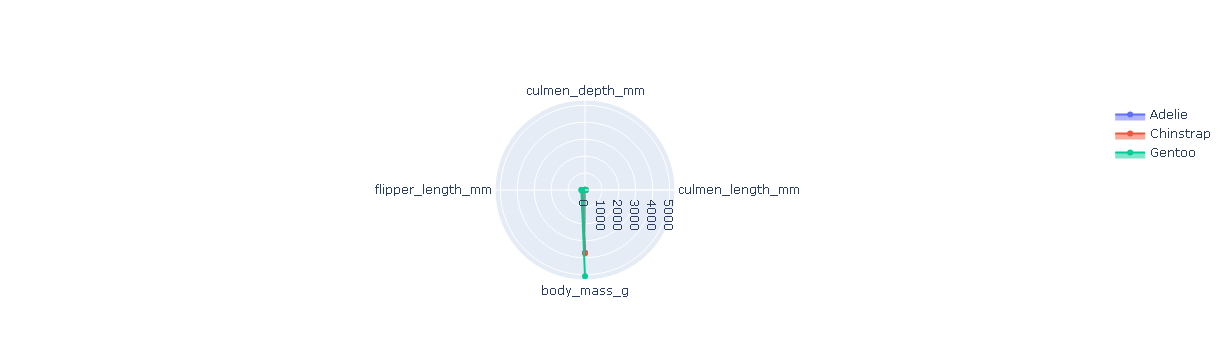

In [33]:
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[0, :], # se grafican los valores de cada columna para el restaurante 1
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Adelie'
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[1, :], # se grafican los valores de cada columna para el restaurante 2
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Chinstrap'
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado.iloc[2, :], # se grafican los valores de cada columna para el restaurante 3
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Gentoo'
    )
)

fig.show()

Se observa una grafica afectada porque todas las variables no tienen el mismo eje. Para resolverlo se realiza una normalización.

#### Normalización
- Aplicar una transformación a mis columnas para llevarlas todas a un mismo rango sin perder las diferencias entre valores.

In [34]:
df2 = df[categorias]
df2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


#### Normalización Min-Max
A continuación se muestra la fórmula para obtener mis nuevos valores:

$x' = \dfrac {x - min(x)}{max(x) - min(x)}$

In [36]:
df_norm = (df2 - df2.min()) / (df2.max() - df2.min()) 
df_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056
340,0.534545,0.142857,0.728814,0.597222
341,0.665455,0.309524,0.847458,0.847222
342,0.476364,0.202381,0.677966,0.694444


In [37]:
# Agregamos las columnas de species
df_norm['species'] = df['species']
df_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,0.254545,0.666667,0.152542,0.291667,Adelie
1,0.269091,0.511905,0.237288,0.305556,Adelie
2,0.298182,0.583333,0.389831,0.152778,Adelie
4,0.167273,0.738095,0.355932,0.208333,Adelie
5,0.261818,0.892857,0.305085,0.263889,Adelie
...,...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056,Gentoo
340,0.534545,0.142857,0.728814,0.597222,Gentoo
341,0.665455,0.309524,0.847458,0.847222,Gentoo
342,0.476364,0.202381,0.677966,0.694444,Gentoo


In [38]:
agrupado_norm = df_norm.groupby('species').mean(numeric_only=True)
agrupado_norm

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,0.244508,0.624674,0.306826,0.279490
Chinstrap,0.608503,0.633403,0.403789,0.286969
Gentoo,0.561545,0.226488,0.766667,0.664062


In [39]:
categorias

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

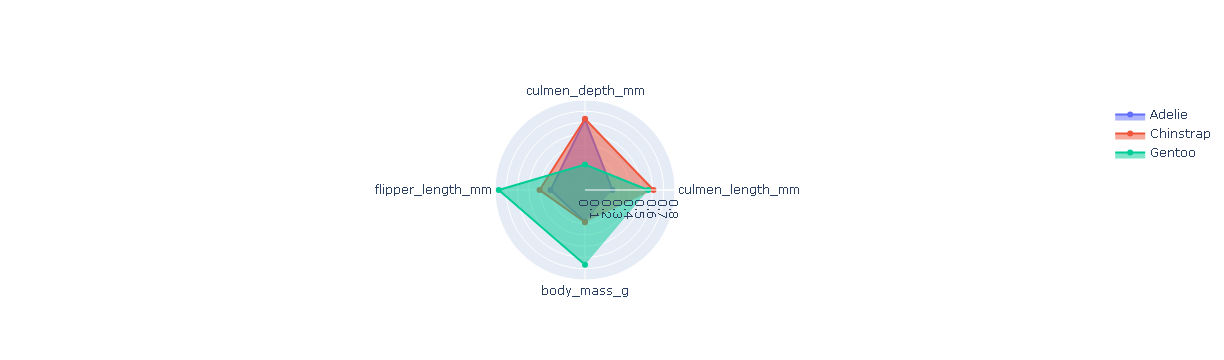

In [40]:
fig = go.Figure()

fig.add_trace(
    go.Scatterpolar(
        r=agrupado_norm.iloc[0, :], # se grafican los valores de cada columna para el restaurante 1
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Adelie'
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado_norm.iloc[1, :], # se grafican los valores de cada columna para el restaurante 2
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Chinstrap'
    )
)

fig.add_trace(
    go.Scatterpolar(
        r=agrupado_norm.iloc[2, :], # se grafican los valores de cada columna para el restaurante 3
        theta=categorias, # también se puede df.columns[1:]
        fill='toself',
        name='Gentoo'
    )
)

fig.show()